In [1]:
# https://opencv.org/releases.html - download OpenCV
# pip install opencv-python
import cv2
import numpy as np

<class 'numpy.ndarray'> (615, 1600)


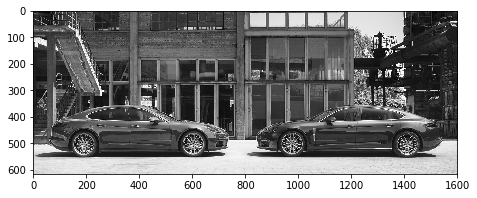

<class 'numpy.ndarray'> (615, 1600, 3)


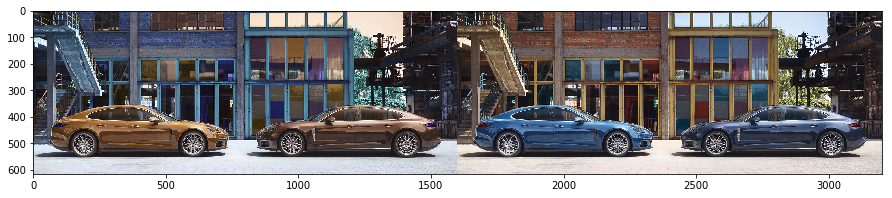

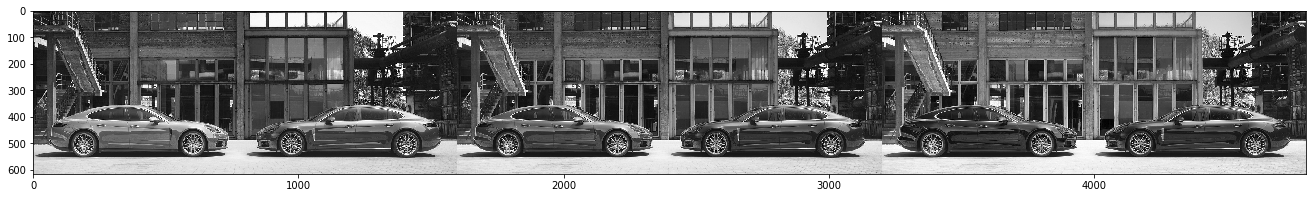

From 0 to 255


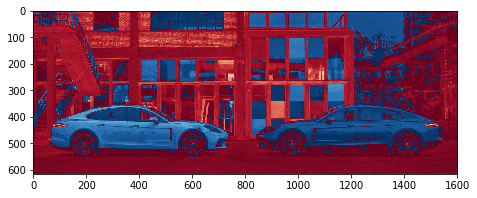

In [4]:
# load an image as 2-d array where value is brightness
img_gray = cv2.imread('datasets/images/cars.jpg', cv2.IMREAD_GRAYSCALE) # .astype('float') # type is numpy array!
print(type(img_gray), img_gray.shape)

# plot grayscale
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.imshow(img_gray, cmap='gray')
plt.show()

# read the same image as color
img_color = cv2.imread('datasets/images/cars.jpg', cv2.IMREAD_COLOR)
print(type(img_color), img_color.shape)

# Color image loaded by OpenCV is in BGR mode (inversed to RGB)
plt.figure(figsize=(20, 3))
# this is how you can fix colors for _presentation_
color_fixed = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_color2 = np.concatenate((img_color, color_fixed), axis=1)
plt.imshow(img_color2)
plt.show()

# different components side-by-side
plt.figure(figsize=(30, 3))
iG, iB, iR = img_color[:,:,0], img_color[:,:,1], img_color[:,:,2]
flat = np.concatenate((iG, iB, iR), axis=1)
plt.imshow(flat, cmap='gray')
plt.show()

# our brain actually operate relative intensities, something like this:
iD = iR - iB
vmax, vmin = iD.max(), iD.min()
print("From", vmin, "to", vmax)
plt.figure(figsize=(10,3))
plt.imshow(iD, cmap='RdBu', vmax=vmax, vmin=vmin)
plt.show()

Components


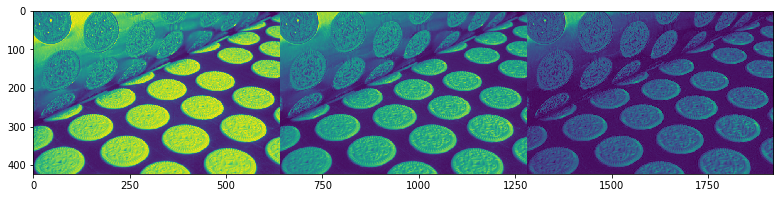

Edges of raw image


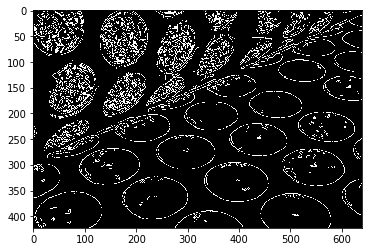

In [6]:
# Any edges with intensity gradient more than maxVal are sure to be edges and 
# those below minVal are sure to be non-edges, so discarded.
cookies = cv2.imread('datasets/images/cookies.jpg', cv2.IMREAD_COLOR)
cB, cG, cR = cookies[:,:,0], cookies[:,:,1], cookies[:,:,2]

# for different cases components can be significantly different
print("Components")
plt.figure(figsize=(30, 3))
plt.imshow(np.concatenate((cR, cG, cB), axis=1))
plt.show()

# better choose a component with best contrast and less noise
print("Edges of raw image")
edges = cv2.Canny(cR, 100, 250) # or iD, ...
plt.imshow(edges, cmap='gray')
plt.show()

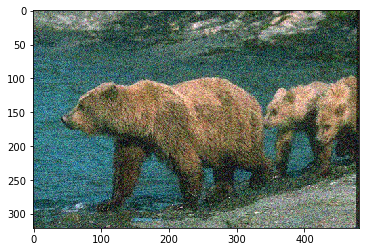

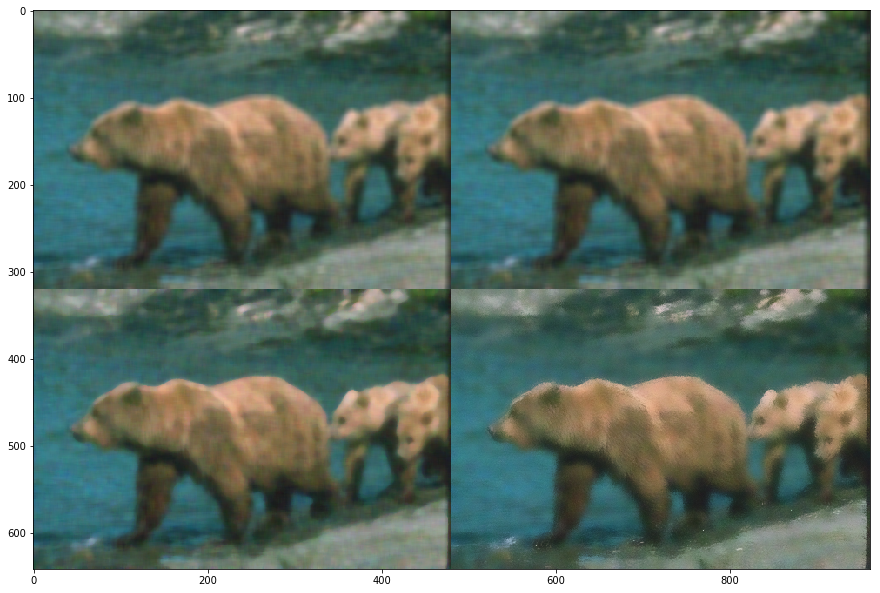

In [8]:
# Denoising - 2 major approaches
# 1) Blur - e.g. normalized box, Gaussian blur (usually with binarization)
# 2) Edge-preserving filters - median, bilateral
bears = cv2.imread('datasets/images/bears.jpg', cv2.IMREAD_COLOR)
bears = cv2.cvtColor(bears, cv2.COLOR_BGR2RGB)
plt.imshow(bears)
plt.show()
blur =  cv2.blur(bears, ksize=(9, 9))
gauss = cv2.GaussianBlur(bears, ksize=(9, 9), sigmaX=15)
median = cv2.medianBlur(bears, 9)
bilateral = cv2.bilateralFilter(bears, d=15, sigmaSpace=20, sigmaColor=150)

i = np.concatenate((np.concatenate((blur, gauss), axis=1), np.concatenate((median, bilateral), axis=1)), axis=0)
plt.figure(figsize=(15,15))
plt.imshow(i)
plt.show()

Smooth edge-preserved image


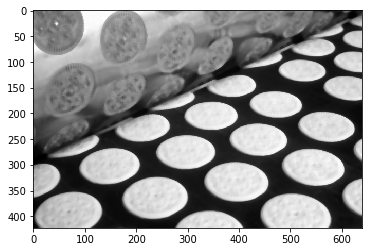

Edges of denoised image


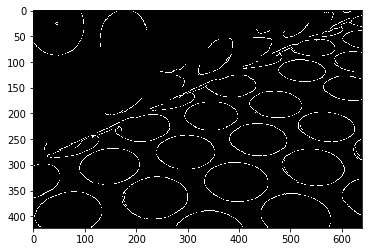

In [10]:
# if image is noisy - preprocessing can include denoisings
# denoising can be done with regular smoothing, or edge-preserving smoothing
# median and bilateral are edge-preserving filters
print("Smooth edge-preserved image")
cR_smooth = cv2.medianBlur(cR, 7) # or bilateral, it is slower
plt.imshow(cR_smooth, cmap='gray')
plt.show()

print("Edges of denoised image")
edges = cv2.Canny(cR_smooth, 100, 250) # or iD, ...
plt.imshow(edges, cmap='gray')
plt.show()

All contours found = 79
Filtered contours found = 16


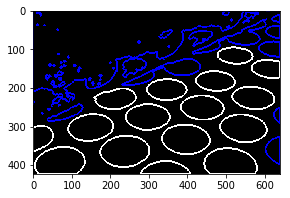

In [12]:
ret, thresh = cv2.threshold(cR_smooth, 100, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Contour Approximation
print("All contours found =", len(contours))
contours_interesting = [c for c in contours if cv2.contourArea(c) > 2000 and cv2.contourArea(c) < 8000]

# let's search for round things!
contours_interesting = [c for c in contours_interesting if (len(c) ** 2) / cv2.contourArea(c) < 5]
print("Filtered contours found =", len(contours_interesting))
# or you can use convex hull if you want to bound an object
# https://docs.opencv.org/3.1.0/d7/d1d/tutorial_hull.html

where_to_draw = np.zeros(cookies.shape, np.uint8)

for i in range(len(contours)):
    cv2.drawContours(where_to_draw, contours, i, (0, 0, 255), 3) # i is contour index, -1 means all, 4 means 5th contour

for i in range(len(contours_interesting)):
    cv2.drawContours(where_to_draw, contours_interesting, i, (255, 255, 255), 3)

plt.figure(figsize=(10, 3))
plt.imshow(where_to_draw, cmap='gray')
plt.show()

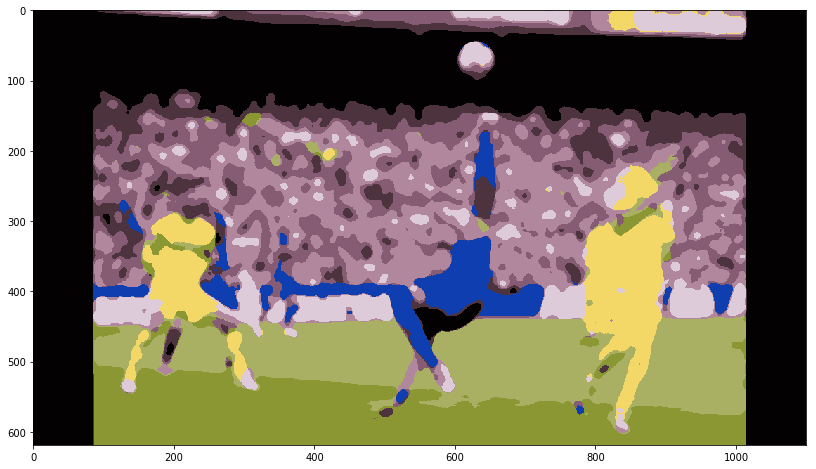

In [14]:
# clustering https://docs.opencv.org/3.1.0/d1/d5c/tutorial_py_kmeans_opencv.html
img = cv2.imread("datasets/images/soccer.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.medianBlur(img, 15)
Z = np.float32(img.reshape((-1,3))) # list of just colors

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 9
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()].reshape((img.shape)) # and back to image shape
plt.figure(figsize=(16,8))
plt.imshow(res)
plt.show()